In [2]:
import pandas as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('uncon_v_con_shock_MR_ROI24_with_covariates.txt',sep='\t')
df.head()

,Subj,ROI,Y,TRAITmean,TRAITdiff,STATEmean,STATEdiff,BPdiff_stdz
0,P00,vmPFC,0.0915,-1.003,-0.0406,-1.2307,-0.1812,-0.8664
1,P00,PCC1,0.5290,-1.003,-0.0406,-1.2307,-0.1812,-0.8664
2,P00,PCC2,0.3904,-1.003,-0.0406,-1.2307,-0.1812,-0.8664
3,P00,rPAG1,0.6907,-1.003,-0.0406,-1.2307,-0.1812,-0.8664
4,P00,lPAG1,-0.0709,-1.003,-0.0406,-1.2307,-0.1812,-0.8664


In [6]:
df.drop(['Y','ROI'],axis=1,inplace=True)
df = df.groupby('Subj').mean().reset_index()
df.head()

,Subj,TRAITmean,TRAITdiff,STATEmean,STATEdiff,BPdiff_stdz
0,P00,-1.0030,-0.0406,-1.2307,-0.1812,-0.8664
1,P01,-0.4359,3.1472,-0.4379,0.4163,0.3736
2,P02,0.1942,0.3136,-0.5172,0.3167,-0.3028
3,P03,-1.5702,1.0220,-1.6270,-0.0816,0.3360
4,P04,-0.2469,-0.0406,-0.2794,0.6155,-0.7913


## Pairwise correlation values for regs of interest

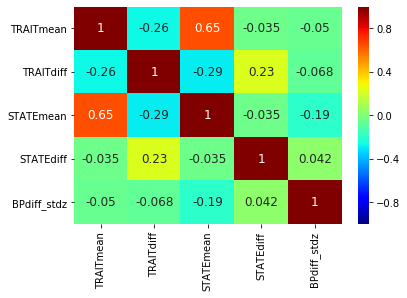

In [11]:
sns.heatmap(df.corr(method="spearman"),vmin=-1,vmax=1,cmap='jet',annot=True,annot_kws={'size':12})

In [12]:
## VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_for_VIF = df.drop('Subj',axis=1).copy()
df_for_VIF = sm.add_constant(df_for_VIF)
VIF_df = pd.DataFrame()
VIF_df['Feature'] = df_for_VIF.columns
VIF_df['VIF'] = [variance_inflation_factor(df_for_VIF.values, i) for i in range(df_for_VIF.shape[1])]
VIF_df[VIF_df['Feature']!='const']

,Feature,VIF
1,TRAITmean,1.730677
2,TRAITdiff,1.107800
3,STATEmean,1.846416
4,STATEdiff,1.062236
5,BPdiff_stdz,1.124439
